In [1]:
# import packages

import numpy as np
import pandas as pd

In [2]:
# import table

thoughts = pd.read_excel("thoughts.xlsx")

In [3]:
# check data

thoughts.head()

,id,respondent_id,text
0,0,17,It's easy to use and very heavily adopted by o...
1,1,38,Easy access is just about the only thing.
2,2,23,youtube makes it really easy to see what kind ...
3,3,5,Being able to mute/block people. It helps keep...
4,4,25,Being able to share content


## Sentiment

In [4]:
# import VaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [5]:
# create empty lists to store sentiment scores
pos = []
neg = []

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    pos_score = sentiment_dict['pos']
    neg_score = sentiment_dict['neg']
    pos.append(pos_score)
    neg.append(neg_score)

In [6]:
sent_list = thoughts['text'].tolist()
sent_list[:5]

["It's easy to use and very heavily adopted by other people.",
 'Easy access is just about the only thing.',
 'youtube makes it really easy to see what kind of an audience my videos have and how people access them',
 'Being able to mute/block people. It helps keep the feed clean',
 'Being able to share content']

In [7]:
# analyze sentiment
for thought in sent_list:
    score = sentiment_scores(thought)
    
pos[:5]

[0.225, 0.293, 0.144, 0.371, 0.355]

In [8]:
thoughts['pos'] = pos
thoughts['neg'] = neg
thoughts.head()

,id,respondent_id,text,pos,neg
0,0,17,It's easy to use and very heavily adopted by o...,0.225,0.0
1,1,38,Easy access is just about the only thing.,0.293,0.0
2,2,23,youtube makes it really easy to see what kind ...,0.144,0.0
3,3,5,Being able to mute/block people. It helps keep...,0.371,0.0
4,4,25,Being able to share content,0.355,0.0


In [9]:
# Overall sentiment

print(thoughts['pos'].mean())
print(thoughts['neg'].mean())

0.21199999999999997
0.04982926829268292


In [10]:
# Separate positive and negative thoughts
pos_thoughts = thoughts[thoughts['pos'] > thoughts['neg']].sort_values('pos', ascending = False)
del pos_thoughts['neg']

neg_thoughts = thoughts[thoughts['pos'] < thoughts['neg']].sort_values('neg', ascending = False)
del neg_thoughts['pos']

pos_thoughts.head()

,id,respondent_id,text,pos
24,24,7,Sharing posts with friends.,0.747
28,28,16,I like that we can share pictures of friends a...,0.494
34,34,36,"I like Instagram's suggested page, they clearl...",0.483
36,36,18,Upvoting/Downvoting content. Ability to easily...,0.402
8,8,0,I love seeing other people's pictures and bein...,0.398


## Tokenize

In [11]:
# import text analysis packages

import string
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

# adding stopwords that often appear in this dataset
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('like')

# test to make sure stopwords loaded correctly
#stopwords.words('english')[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cclifford.CSCS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# function to remove punctuation from tokenization

def text_process(thought):
    # check characters to see if they are in punctuation
    nopunc = [char for char in thought if char not in string.punctuation]

    # join the characters to form string
    nopunc = ''.join(nopunc)
    
    # remove stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords]

In [13]:
# test function

thoughts['text'].head().apply(text_process)

0                [easy, use, heavily, adopted, people]
1                                [Easy, access, thing]
2    [youtube, makes, really, easy, see, kind, audi...
3    [able, muteblock, people, helps, keep, feed, c...
4                               [able, share, content]
Name: text, dtype: object

In [14]:
# apply tokenization to positive and negative thought dataframes
thoughts['token'] = thoughts['text'].apply(text_process)
pos_thoughts['token'] = pos_thoughts['text'].apply(text_process)
neg_thoughts['token'] = neg_thoughts['text'].apply(text_process)

pos_thoughts.head()

,id,respondent_id,text,pos,token
24,24,7,Sharing posts with friends.,0.747,"[Sharing, posts, friends]"
28,28,16,I like that we can share pictures of friends a...,0.494,"[share, pictures, friends, family]"
34,34,36,"I like Instagram's suggested page, they clearl...",0.483,"[Instagrams, suggested, page, clearly, know, e..."
36,36,18,Upvoting/Downvoting content. Ability to easily...,0.402,"[UpvotingDownvoting, content, Ability, easily,..."
8,8,0,I love seeing other people's pictures and bein...,0.398,"[love, seeing, peoples, pictures, able, commun..."


In [15]:
# tokenized text to list

thoughts_list = thoughts['token'].tolist()
pos_list = pos_thoughts['token'].tolist()
neg_list = neg_thoughts['token'].tolist()
pos_list[:5]

[['Sharing', 'posts', 'friends'],
 ['share', 'pictures', 'friends', 'family'],
 ['Instagrams', 'suggested', 'page', 'clearly', 'know', 'ememes', 'enjoy'],
 ['UpvotingDownvoting', 'content', 'Ability', 'easily', 'filter', 'see'],
 ['love', 'seeing', 'peoples', 'pictures', 'able', 'communicate', 'easily']]

In [16]:
# cosolidate list of lists

thoughts_list_one = [item.lower() for sublist in thoughts_list for item in sublist]
pos_list_one = [item.lower() for sublist in pos_list for item in sublist]
neg_list_one = [item.lower() for sublist in neg_list for item in sublist]
thoughts_list_one[:10]

['easy',
 'use',
 'heavily',
 'adopted',
 'people',
 'easy',
 'access',
 'thing',
 'youtube',
 'makes']

In [17]:
# group and count token by sentiment

top_thoughts = Counter(thoughts_list_one)
top_pos = Counter(pos_list_one)
top_neg = Counter(neg_list_one)

top_10_thoughts = top_thoughts.most_common(10)
top_10_pos = top_pos.most_common(10)
top_10_neg = top_neg.most_common(10)

print(top_10_thoughts)
print(top_10_pos)
print(top_10_neg)

[('people', 8), ('easy', 7), ('keep', 6), ('posts', 6), ('friends', 6), ('able', 5), ('pictures', 5), ('easily', 5), ('family', 5), ('use', 4)]
[('people', 7), ('easy', 7), ('friends', 6), ('family', 5), ('easily', 5), ('pictures', 4), ('ability', 4), ('see', 4), ('able', 4), ('use', 4)]
[('posts', 2), ('blocking', 1), ('useless', 1), ('nothing', 1), ('honest', 1), ('stands', 1), ('outits', 1), ('adequate', 1), ('seeing', 1), ('peoples', 1)]


In [18]:
top_thoughts_df = pd.DataFrame.from_records(top_10_thoughts,columns=['Word','All Thoughts'])
top_pos_df = pd.DataFrame.from_records(top_10_pos,columns=['Word','Pos Thoughts'])
top_neg_df = pd.DataFrame.from_records(top_10_neg,columns=['Word','Neg Thoughts'])

top_thoughts_df

,Word,All Thoughts
0,people,8
1,easy,7
2,keep,6
3,posts,6
4,friends,6
5,able,5
6,pictures,5
7,easily,5
8,family,5
9,use,4


In [19]:
top_thoughts_df_all = pd.merge(top_thoughts_df,top_pos_df,how="outer")
top_thoughts_df_all = pd.merge(top_thoughts_df_all,top_neg_df,how="outer")
top_thoughts_df_all

,Word,All Thoughts,Pos Thoughts,Neg Thoughts
0,people,8.0,7.0,NaN
1,easy,7.0,7.0,NaN
2,keep,6.0,NaN,NaN
3,posts,6.0,NaN,2.0
4,friends,6.0,6.0,NaN
5,able,5.0,4.0,NaN
6,pictures,5.0,4.0,NaN
7,easily,5.0,5.0,NaN
8,family,5.0,5.0,NaN
9,use,4.0,4.0,NaN


## Word Cloud

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [21]:
# convert lists to strings

def ListToString(s):
    str1 = " "
    return(str1.join(s))

thoughts_str = ListToString(thoughts_list_one)
pos_str = ListToString(pos_list_one)
neg_str = ListToString(neg_list_one)
thoughts_str[:25]

'easy use heavily adopted '

In [22]:
# create word cloud function
def create_wc(string):
    thoughts_wc = WordCloud(background_color='white')
    thoughts_wc.generate(string)

    # display word cloud
    fig = plt.figure(figsize=[14,8])
    plt.imshow(thoughts_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

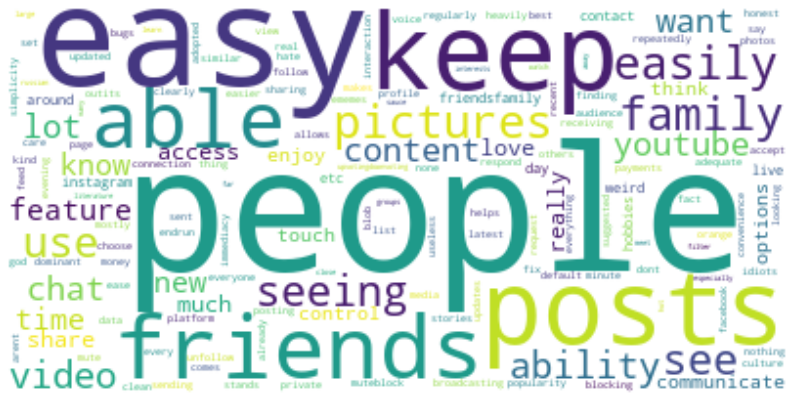

In [23]:
# all thoughts word cloud
create_wc(thoughts_str)

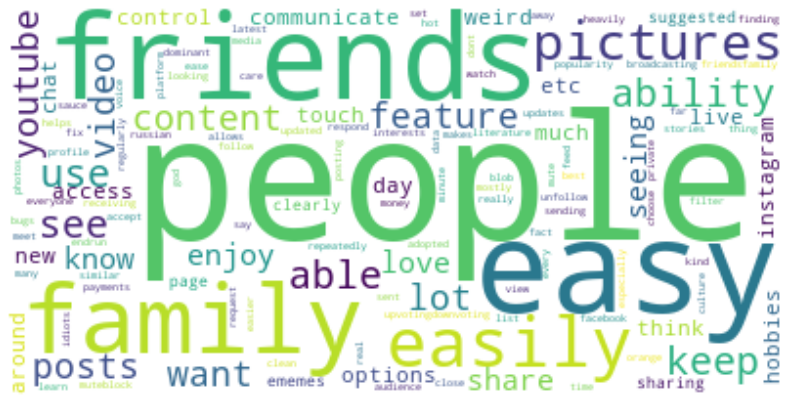

In [24]:
# pos thoughts word cloud
create_wc(pos_str)

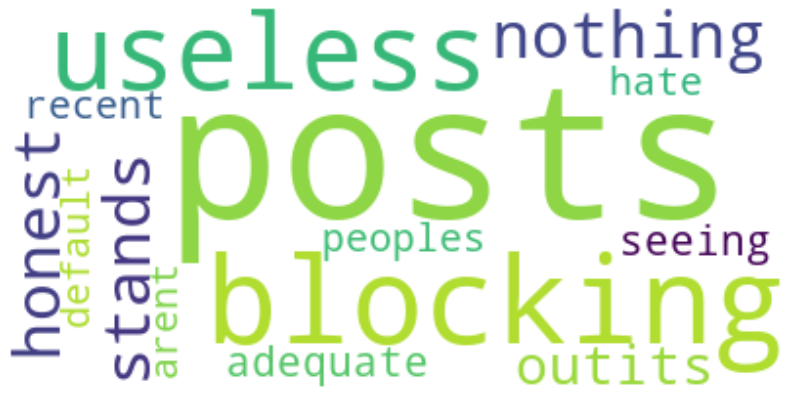

In [25]:
# neg thoughts word cloud
create_wc(neg_str)